# Connecting Probability Theory to ML Model Implementations

## 📚 Learning Objectives

By completing this notebook, you will:
- Connect probability theory to ML model implementations
- Understand how probability distributions are used in ML
- Apply probability concepts to model training and evaluation
- See probability theory in action in real ML scenarios

## 🔗 Prerequisites

- ✅ Understanding of probability distributions
- ✅ Understanding of machine learning concepts
- ✅ Python, NumPy, scikit-learn knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 5**:
- Connecting probability theory to ML model implementations
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 5 Practical Content

---

## Introduction

**Probability theory** is fundamental to machine learning. ML models make probabilistic predictions, loss functions are based on probability, and uncertainty quantification relies on probability distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")
print("\nConnecting Probability Theory to ML Model Implementations")
print("=" * 60)

✅ Libraries imported!

Connecting Probability Theory to ML Model Implementations


## Part 1: Probability in Classification (Logistic Regression)


Part 1: Probability in Classification (Logistic Regression)

Logistic Regression Model:
  Training samples: 140
  Test samples: 60

Sample predictions:
  Sample 1: True class=1, Predicted prob=0.7547, Predicted class=1
  Sample 2: True class=1, Predicted prob=0.9736, Predicted class=1
  Sample 3: True class=0, Predicted prob=0.1086, Predicted class=0
  Sample 4: True class=1, Predicted prob=0.7800, Predicted class=1
  Sample 5: True class=1, Predicted prob=0.8766, Predicted class=1

Cross-entropy loss (negative log-likelihood): 0.1314


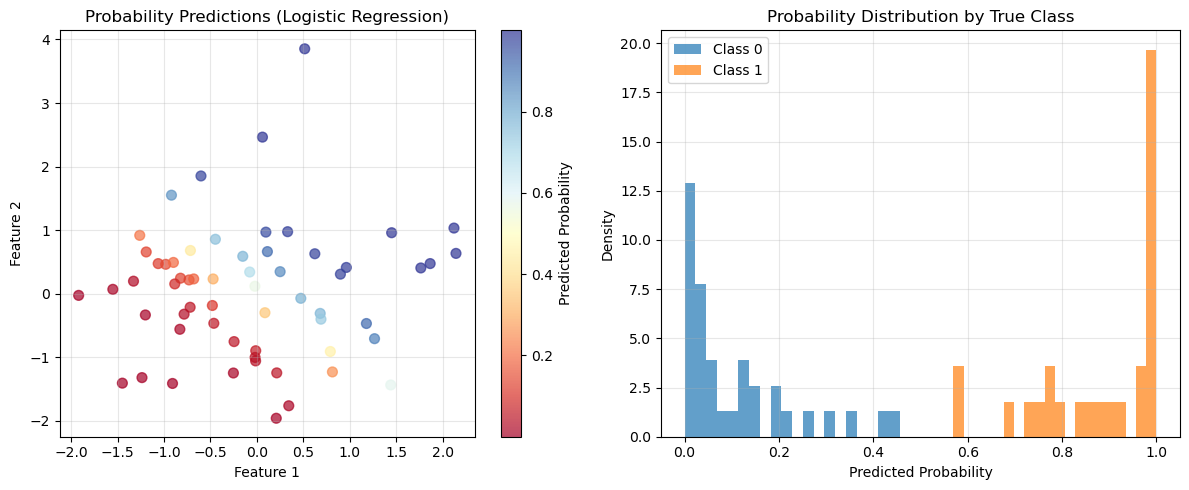


✅ Probability in classification demonstrated!


In [2]:
print("=" * 60)
print("Part 1: Probability in Classification (Logistic Regression)")
print("=" * 60)

# Generate data
np.random.seed(42)
n_samples = 200
X = np.random.randn(n_samples, 2)
# Create binary classification problem
y = ((X[:, 0] + X[:, 1]) > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Get probability predictions (this is probability theory in action!)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print(f"\nLogistic Regression Model:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")
print(f"\nSample predictions:")
for i in range(5):
    print(f"  Sample {i+1}: True class={y_test[i]}, Predicted prob={y_proba[i]:.4f}, Predicted class={y_pred[i]}")

# Cross-entropy loss (based on probability)
loss = log_loss(y_test, y_proba)
print(f"\nCross-entropy loss (negative log-likelihood): {loss:.4f}")

# Visualize probability predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_proba, cmap='RdYlBu', s=50, alpha=0.7)
plt.colorbar(scatter, label='Predicted Probability')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Probability Predictions (Logistic Regression)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.7, label='Class 0', density=True)
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.7, label='Class 1', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Probability Distribution by True Class')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Probability in classification demonstrated!")

## Part 2: Bayesian Inference in ML (Naive Bayes)



Part 2: Bayesian Inference in ML (Naive Bayes)

Naive Bayes Model (Bayesian Classification):
  Class priors: [0.47142857 0.52857143]
  Uses Bayes' theorem for classification

Sample predictions:
  Sample 1: True class=1, Bayesian prob=0.7425
  Sample 2: True class=1, Bayesian prob=0.9856
  Sample 3: True class=0, Bayesian prob=0.2126
  Sample 4: True class=1, Bayesian prob=0.6524
  Sample 5: True class=1, Bayesian prob=0.7533

Cross-entropy loss (Naive Bayes): 0.2377


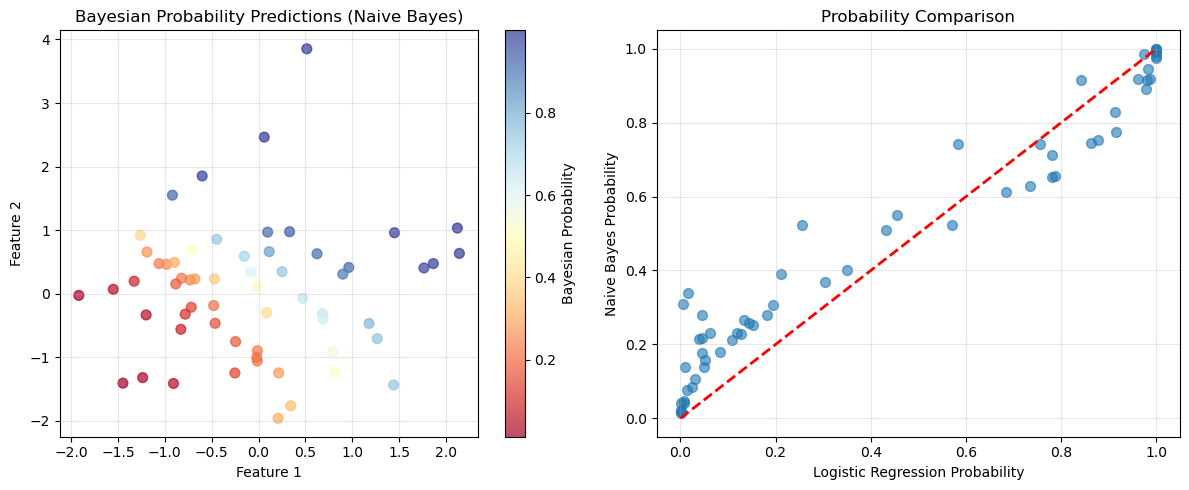


✅ Bayesian inference in ML demonstrated!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Bayesian Inference in ML (Naive Bayes)")
print("=" * 60)

# Naive Bayes uses Bayes' theorem: P(class|features) ∝ P(features|class) * P(class)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Get probability predictions using Bayes' theorem
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

print(f"\nNaive Bayes Model (Bayesian Classification):")
print(f"  Class priors: {nb_model.class_prior_}")
print(f"  Uses Bayes' theorem for classification")
print(f"\nSample predictions:")
for i in range(5):
    print(f"  Sample {i+1}: True class={y_test[i]}, Bayesian prob={y_proba_nb[i]:.4f}")

# Compare with logistic regression
loss_nb = log_loss(y_test, y_proba_nb)
print(f"\nCross-entropy loss (Naive Bayes): {loss_nb:.4f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_proba_nb, cmap='RdYlBu', s=50, alpha=0.7)
plt.colorbar(scatter, label='Bayesian Probability')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Bayesian Probability Predictions (Naive Bayes)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_proba, y_proba_nb, alpha=0.6, s=50)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlabel('Logistic Regression Probability')
plt.ylabel('Naive Bayes Probability')
plt.title('Probability Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Bayesian inference in ML demonstrated!")

## Part 3: Probability Distributions in Loss Functions



Part 3: Probability Distributions in Loss Functions

Loss Functions and Probability Distributions:
  1. Mean Squared Error (MSE) ↔ Gaussian distribution
  2. Cross-entropy loss ↔ Multinomial distribution
  3. Negative log-likelihood ↔ Maximum likelihood estimation

Regression Example:
  True values: [1. 2. 3. 4. 5.]
  Predictions: [1.2 1.8 3.1 3.9 5.2]
  MSE: 0.0280
  Estimated σ (std of residuals): 0.1673


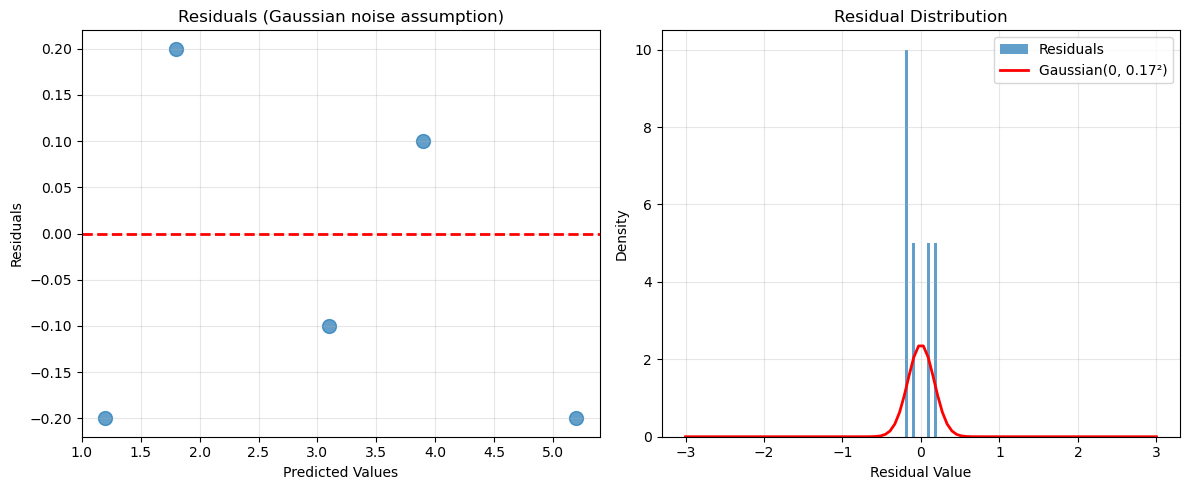


✅ Probability distributions in loss functions demonstrated!


In [4]:
print("\n" + "=" * 60)
print("Part 3: Probability Distributions in Loss Functions")
print("=" * 60)

# Many ML loss functions are derived from probability distributions
print("\nLoss Functions and Probability Distributions:")
print("  1. Mean Squared Error (MSE) ↔ Gaussian distribution")
print("  2. Cross-entropy loss ↔ Multinomial distribution")
print("  3. Negative log-likelihood ↔ Maximum likelihood estimation")

# Demonstrate: MSE and Gaussian distribution
y_true_reg = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_pred_reg = np.array([1.2, 1.8, 3.1, 3.9, 5.2])

mse = np.mean((y_true_reg - y_pred_reg)**2)
print(f"\nRegression Example:")
print(f"  True values: {y_true_reg}")
print(f"  Predictions: {y_pred_reg}")
print(f"  MSE: {mse:.4f}")

# MSE assumes Gaussian noise: y ~ N(ŷ, σ²)
# Maximizing likelihood = minimizing MSE
sigma = np.sqrt(mse)
print(f"  Estimated σ (std of residuals): {sigma:.4f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
residuals = y_true_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, s=100, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals (Gaussian noise assumption)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x = np.linspace(-3, 3, 100)
plt.hist(residuals, bins=10, density=True, alpha=0.7, label='Residuals')
plt.plot(x, stats.norm.pdf(x, 0, sigma), 'r-', linewidth=2, label=f'Gaussian(0, {sigma:.2f}²)')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.title('Residual Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Probability distributions in loss functions demonstrated!")

## Summary

### Key Connections:
1. **Classification**: Models output probabilities (logistic regression, Naive Bayes)
2. **Loss Functions**: Derived from probability distributions (MSE ↔ Gaussian, cross-entropy ↔ multinomial)
3. **Bayesian ML**: Uses Bayes' theorem for inference (Naive Bayes, Bayesian neural networks)
4. **Uncertainty**: Probability distributions quantify prediction uncertainty
5. **Maximum Likelihood**: Training often maximizes likelihood (equivalent to minimizing negative log-likelihood)

### Probability in ML:
- **Predictions**: Probabilistic outputs, not just point estimates
- **Training**: Maximum likelihood estimation
- **Evaluation**: Likelihood-based metrics (log-likelihood, cross-entropy)
- **Uncertainty**: Probability distributions represent uncertainty

### Applications:
- Probabilistic predictions
- Uncertainty quantification
- Bayesian inference
- Model comparison
- Decision making under uncertainty

**Reference:** Course 03, Unit 5: "Probability and Statistical Inference" - Connecting probability to ML practical content